In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_train = np.load('../data/serialized_seq/x_train.npy')
x_test = np.load('../data/serialized_seq/x_test.npy')
y_train = np.load('../data/serialized_seq/y_train.npy')
y_test = np.load('../data/serialized_seq/y_test.npy')

In [4]:
x_train.shape

(400, 6, 15)

## baseline model

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [77]:
model = Sequential()
model.add(layers.Flatten(input_shape=(x_train.shape[-2], x_train.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

In [78]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [79]:
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/20
320/320 [==============================] - 0s 874us/step - loss: 0.1975 - mean_absolute_error: 0.1975 - val_loss: 0.1176 - val_mean_absolute_error: 0.1176
Epoch 2/20
320/320 [==============================] - 0s 64us/step - loss: 0.1786 - mean_absolute_error: 0.1786 - val_loss: 0.0977 - val_mean_absolute_error: 0.0977
Epoch 3/20
320/320 [==============================] - 0s 59us/step - loss: 0.1294 - mean_absolute_error: 0.1294 - val_loss: 0.0637 - val_mean_absolute_error: 0.0637
Epoch 4/20
320/320 [==============================] - 0s 60us/step - loss: 0.1012 - mean_absolute_error: 0.1012 - val_loss: 0.0531 - val_mean_absolute_error: 0.0531
Epoch 5/20
320/320 [==============================] - 0s 60us/step - loss: 0.0748 - mean_absolute_error: 0.0748 - val_loss: 0.0479 - val_mean_absolute_error: 0.0479
Epoch 6/20
320/320 [==============================] - 0s 60us/step - loss: 0.0583 - mean_absolute_error: 0.0583 - val_loss: 0.042

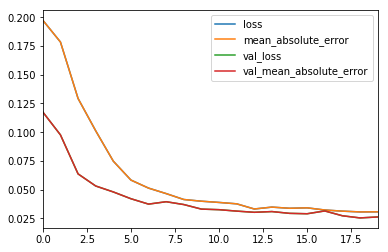

In [80]:
pd.DataFrame(history.history).plot(kind='line')
plt.show()

In [81]:
preds = model.predict(x_test)

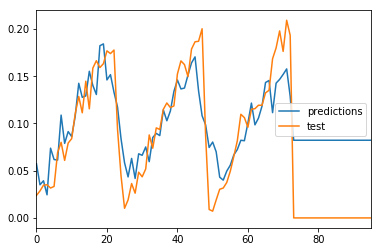

In [82]:
pd.DataFrame({'predictions':[x for y in preds for x in y], 
              'test':y_test}).plot(kind='line')
plt.show()

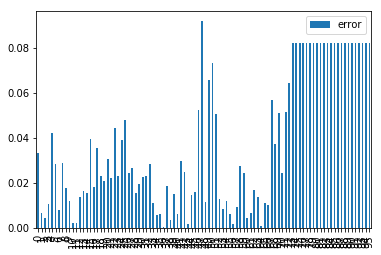

In [83]:
pd.DataFrame({'error': np.abs(np.array([x for y in preds for x in y]) - y_test)}).plot(kind='bar')
plt.show()

In [84]:
np.mean(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.03745058741649642

In [85]:
np.max(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.09207746249680618

## Recurrent net

In [50]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(x_train.shape[-2], x_train.shape[-1])))
model.add(layers.Dense(1))

In [51]:
model.compile(optimizer='rmsprop', loss='mae')

In [52]:
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/20
320/320 [==============================] - 0s 972us/step - loss: 0.0718 - val_loss: 0.0596
Epoch 2/20
320/320 [==============================] - 0s 162us/step - loss: 0.0523 - val_loss: 0.0462
Epoch 3/20
320/320 [==============================] - 0s 163us/step - loss: 0.0411 - val_loss: 0.0381
Epoch 4/20
320/320 [==============================] - 0s 163us/step - loss: 0.0363 - val_loss: 0.0347
Epoch 5/20
320/320 [==============================] - 0s 167us/step - loss: 0.0343 - val_loss: 0.0333
Epoch 6/20
320/320 [==============================] - 0s 165us/step - loss: 0.0326 - val_loss: 0.0375
Epoch 7/20
320/320 [==============================] - 0s 164us/step - loss: 0.0306 - val_loss: 0.0401
Epoch 8/20
320/320 [==============================] - 0s 167us/step - loss: 0.0323 - val_loss: 0.0335
Epoch 9/20
320/320 [==============================] - 0s 166us/step - loss: 0.0295 - val_loss: 0.0312
Epoch 10/20
320/320 [================

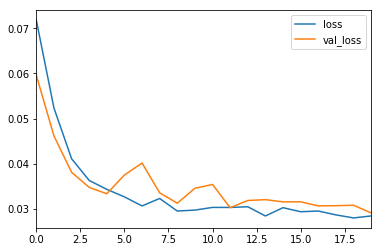

In [58]:
pd.DataFrame(history.history).plot(kind='line')
plt.show()

In [53]:
preds = model.predict(x_test)

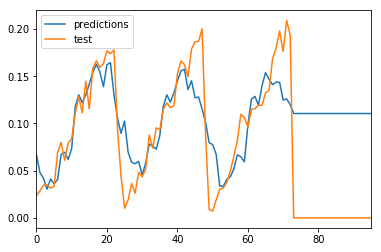

In [54]:
pd.DataFrame({'predictions':[x for y in preds for x in y], 
              'test':y_test}).plot(kind='line')
plt.show()

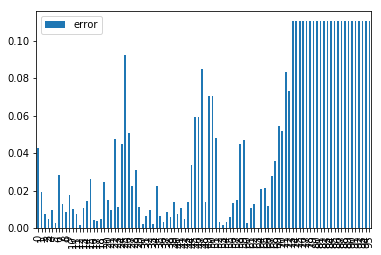

In [55]:
pd.DataFrame({'error': np.abs(np.array([x for y in preds for x in y]) - y_test)}).plot(kind='bar')
plt.show()

In [56]:
np.mean(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.04414742686830634

In [57]:
np.max(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.1105094701051712

## Stacking Recurrent Nets

In [97]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(x_train.shape[-2], x_train.shape[-1]),
                    return_sequences=True))
model.add(layers.GRU(64, activation='relu'))
model.add(layers.Dense(1))

In [98]:
model.compile(optimizer='rmsprop', loss='mae')

In [112]:
history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/30
320/320 [==============================] - 0s 288us/step - loss: 0.0215 - val_loss: 0.0229
Epoch 2/30
320/320 [==============================] - 0s 280us/step - loss: 0.0206 - val_loss: 0.0209
Epoch 3/30
320/320 [==============================] - 0s 288us/step - loss: 0.0208 - val_loss: 0.0214
Epoch 4/30
320/320 [==============================] - 0s 285us/step - loss: 0.0185 - val_loss: 0.0235
Epoch 5/30
320/320 [==============================] - 0s 282us/step - loss: 0.0189 - val_loss: 0.0225
Epoch 6/30
320/320 [==============================] - 0s 284us/step - loss: 0.0186 - val_loss: 0.0231
Epoch 7/30
320/320 [==============================] - 0s 279us/step - loss: 0.0192 - val_loss: 0.0231
Epoch 8/30
320/320 [==============================] - 0s 285us/step - loss: 0.0182 - val_loss: 0.0180
Epoch 9/30
320/320 [==============================] - 0s 283us/step - loss: 0.0184 - val_loss: 0.0236
Epoch 10/30
320/320 [================

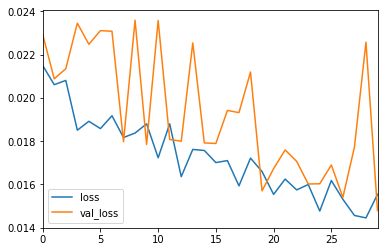

In [113]:
pd.DataFrame(history.history).plot(kind='line')
plt.show()

In [114]:
preds = model.predict(x_test)

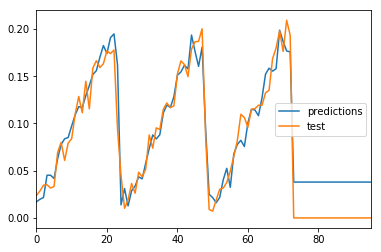

In [115]:
pd.DataFrame({'predictions':[x for y in preds for x in y], 
              'test':y_test}).plot(kind='line')
plt.show()

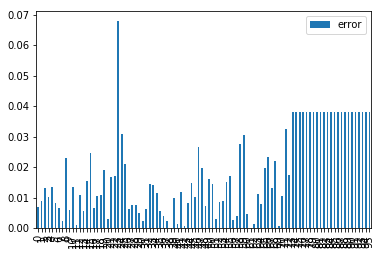

In [116]:
pd.DataFrame({'error': np.abs(np.array([x for y in preds for x in y]) - y_test)}).plot(kind='bar')
plt.show()

In [117]:
np.mean(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.018279733296426737

In [118]:
np.max(np.abs(np.array([x for y in preds for x in y]) - y_test))

0.06797955315940234

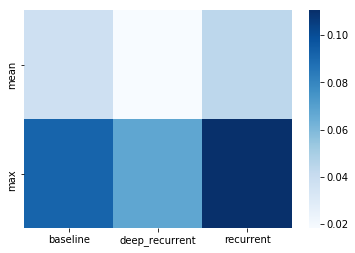

In [119]:
df = pd.DataFrame({'baseline': [0.03745058741649642, 0.09207746249680618], 
              'recurrent': [0.04414742686830634,0.1105094701051712], 
              'deep_recurrent': [0.018279733296426737,0.06797955315940234]}, index=['mean','max'])
sns.heatmap(df,cmap='Blues')
plt.show()